In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import entropy

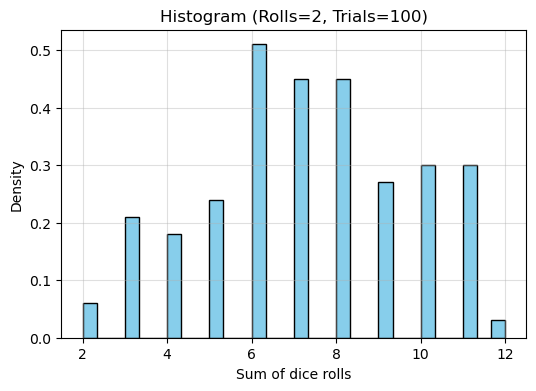

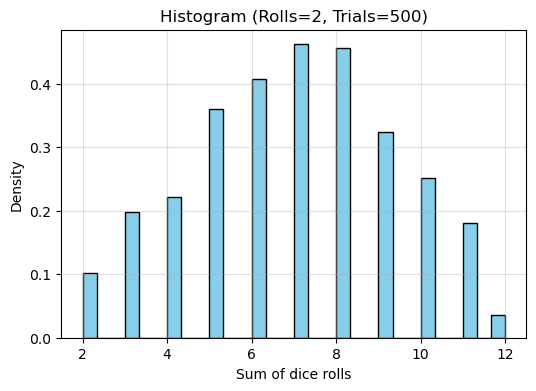

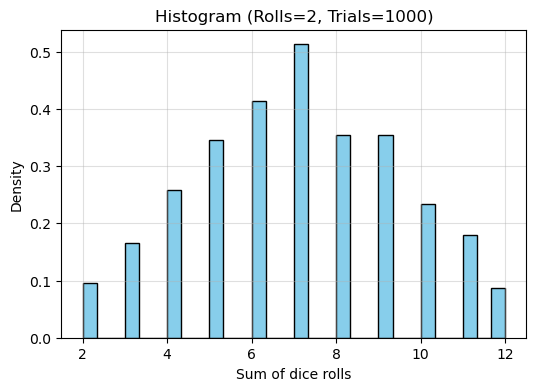

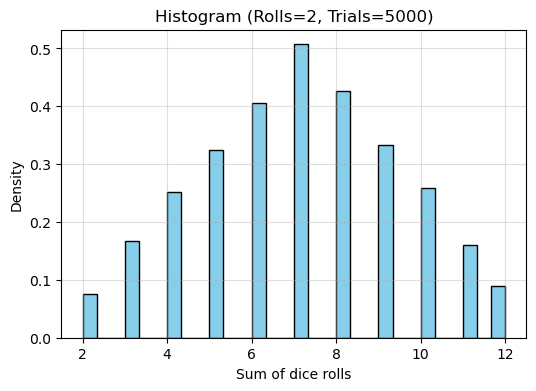

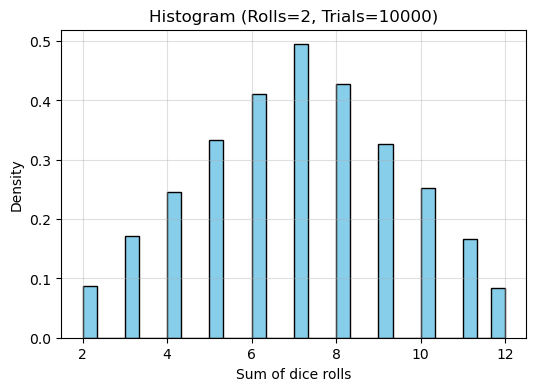

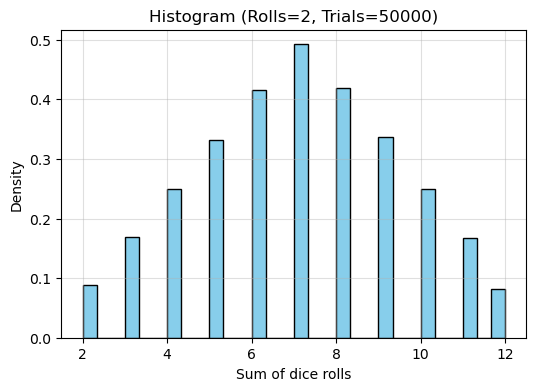

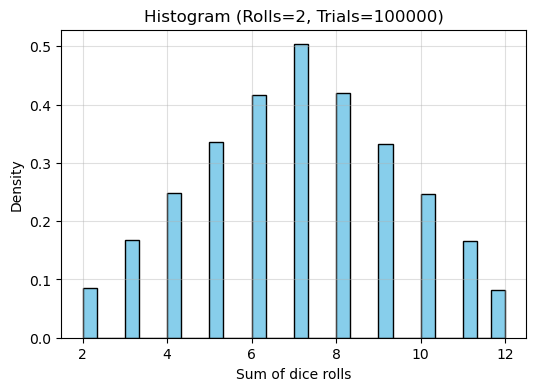

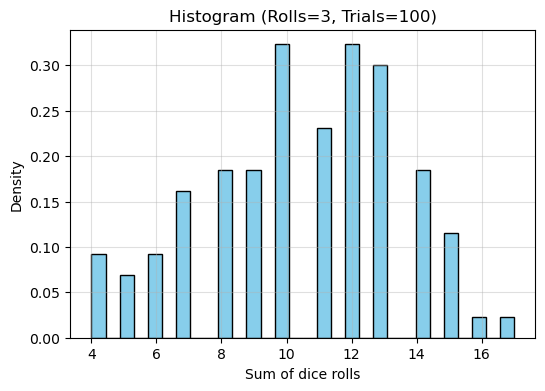

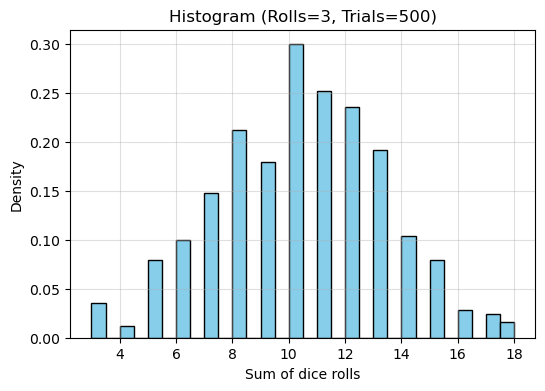

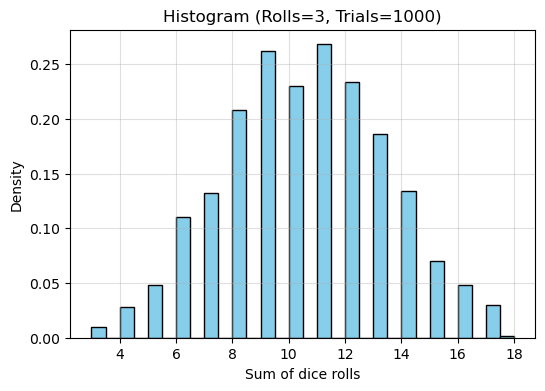

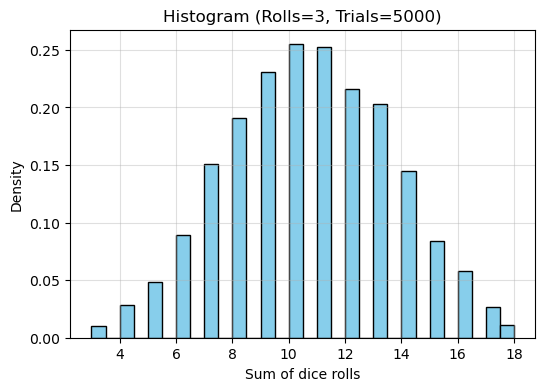

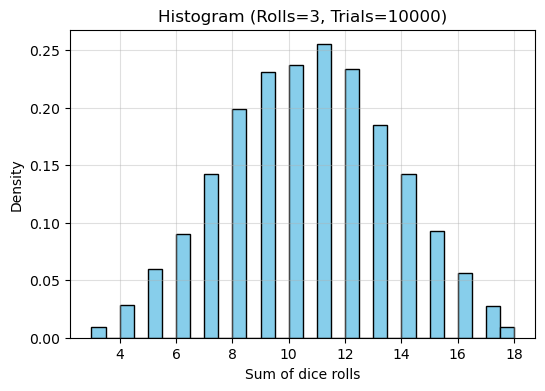

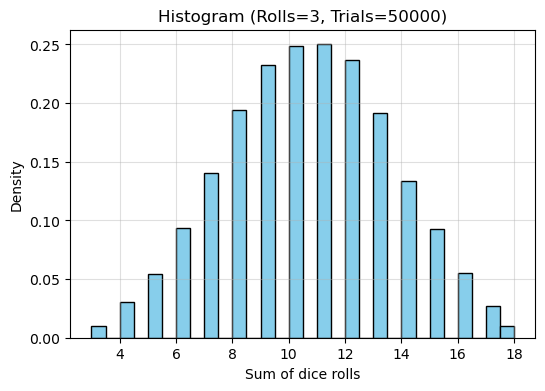

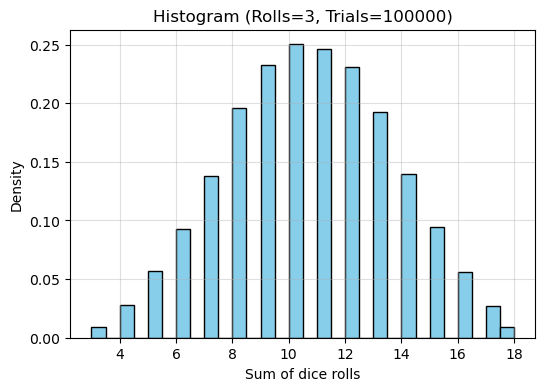

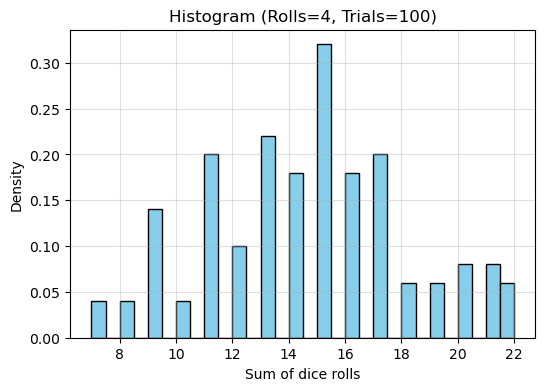

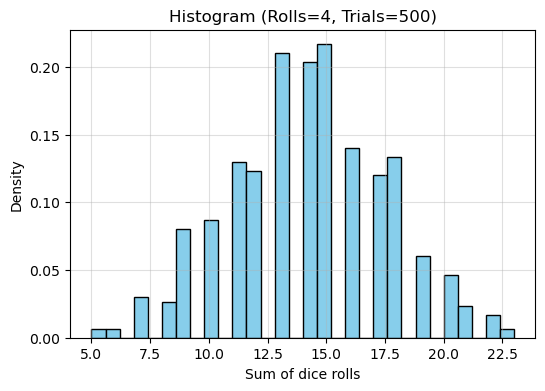

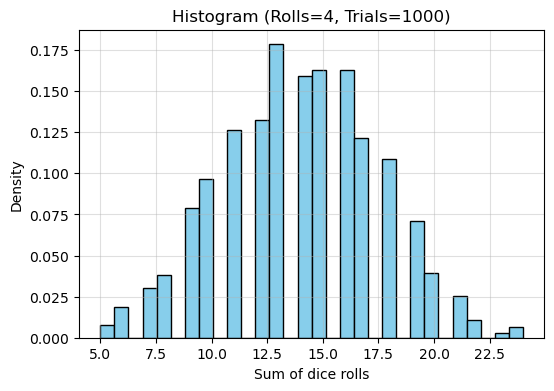

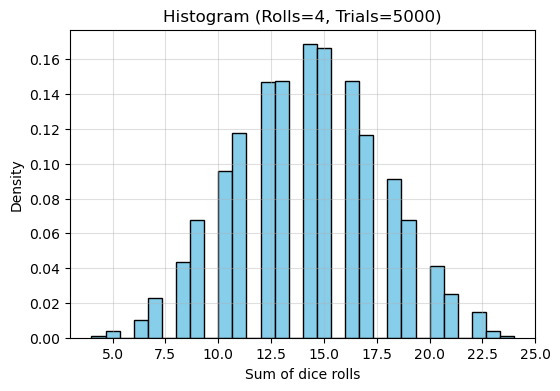

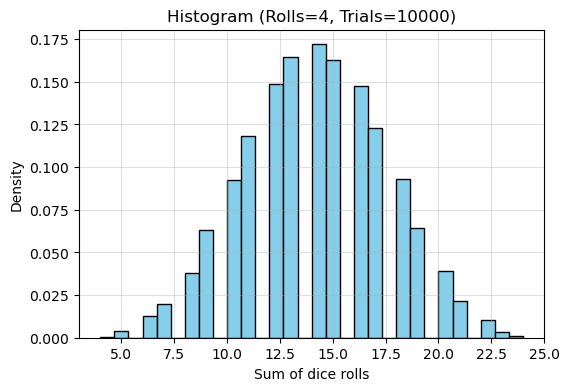

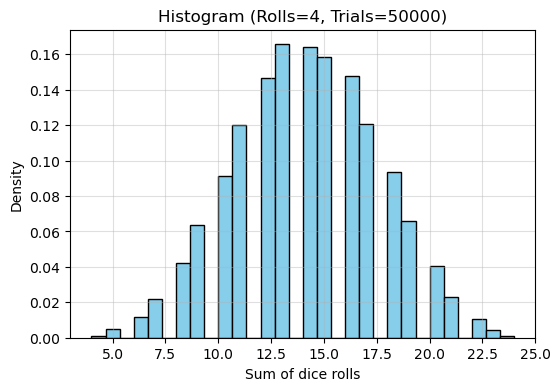

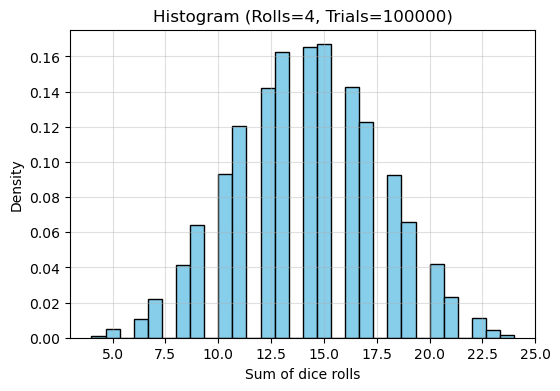

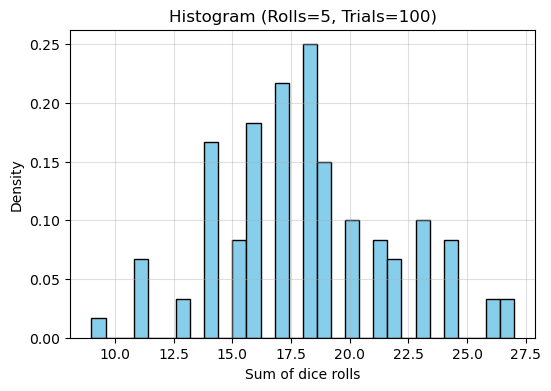

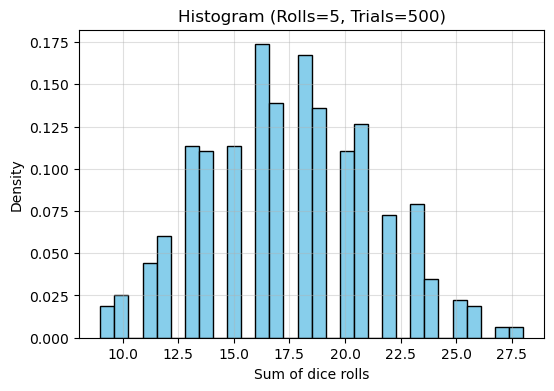

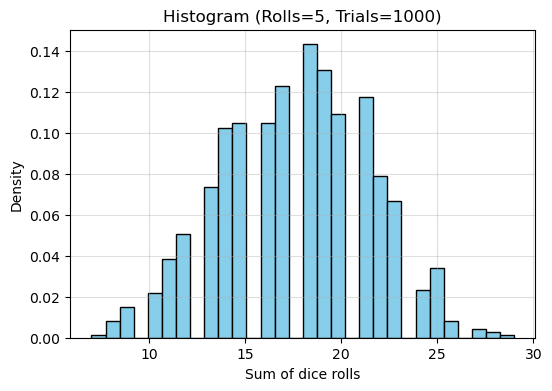

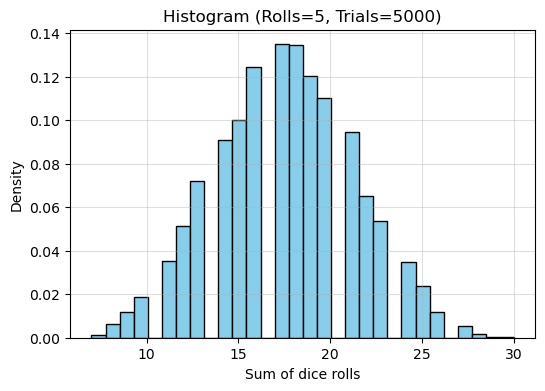

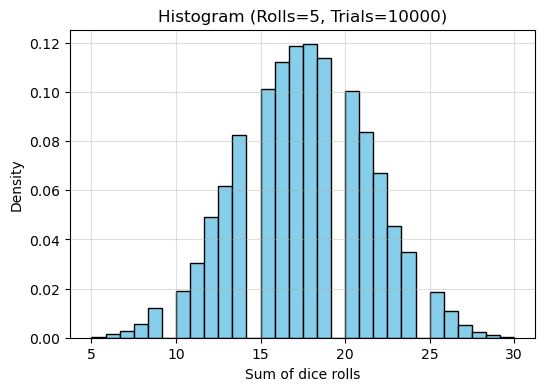

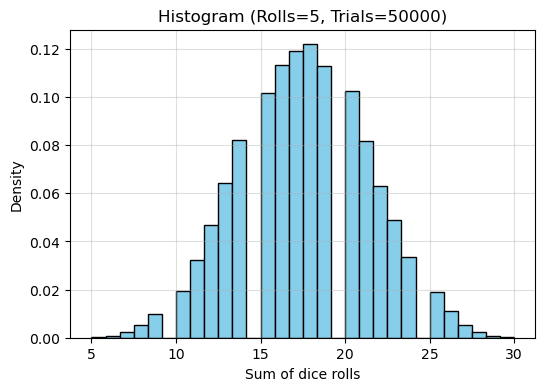

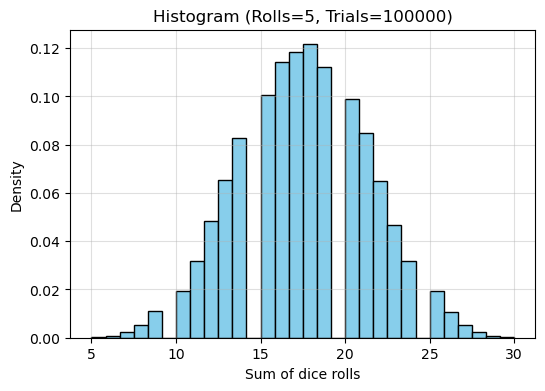


=== 2 Dice Rolls ===
Trials=   100 | Mean=7.190 | Var=5.874
Trials=   500 | Mean=6.888 | Var=5.775
Trials=  1000 | Mean=6.967 | Var=6.028
Trials=  5000 | Mean=7.032 | Var=5.807
Trials= 10000 | Mean=6.996 | Var=5.881
Trials= 50000 | Mean=6.991 | Var=5.878
Trials=100000 | Mean=6.991 | Var=5.816

=== 3 Dice Rolls ===
Trials=   100 | Mean=10.470 | Var=8.849
Trials=   500 | Mean=10.204 | Var=8.934
Trials=  1000 | Mean=10.351 | Var=8.296
Trials=  5000 | Mean=10.506 | Var=8.733
Trials= 10000 | Mean=10.488 | Var=8.848
Trials= 50000 | Mean=10.479 | Var=8.782
Trials=100000 | Mean=10.497 | Var=8.796

=== 4 Dice Rolls ===
Trials=   100 | Mean=14.470 | Var=12.729
Trials=   500 | Mean=14.150 | Var=11.123
Trials=  1000 | Mean=13.984 | Var=12.494
Trials=  5000 | Mean=14.030 | Var=11.848
Trials= 10000 | Mean=14.013 | Var=11.240
Trials= 50000 | Mean=14.003 | Var=11.642
Trials=100000 | Mean=14.021 | Var=11.667

=== 5 Dice Rolls ===
Trials=   100 | Mean=18.090 | Var=13.502
Trials=   500 | Mean=17.478 | V

In [14]:
NUM_ROLLS = range(2, 6)  
TRIALS = [100, 500, 1000, 5000, 10000, 50000, 100000]
DIE_SIDES = 6

def simulate_experiment(num_rolls, num_trials):
    rolls = np.random.randint(1, DIE_SIDES+1, size=(num_trials, num_rolls))
    sums = np.sum(rolls, axis=1)
    return sums

results = {}
for n in NUM_ROLLS:
    results[n] = {}
    for t in TRIALS:
        sums = simulate_experiment(n, t)
        
        results[n][t] = {
            "mean": np.mean(sums),
            "var": np.var(sums),
            "data": sums
        }
        
        plt.figure(figsize=(6,4))
        plt.hist(sums, bins=30, density=True, color="skyblue", edgecolor="black")
        plt.title(f"Histogram (Rolls={n}, Trials={t})")
        plt.xlabel("Sum of dice rolls")
        plt.ylabel("Density")
        plt.grid(True, alpha=0.4)
        plt.show() 

for n in NUM_ROLLS:
    print(f"\n=== {n} Dice Rolls ===")
    for t in TRIALS:
        print(f"Trials={t:6d} | Mean={results[n][t]['mean']:.3f} | Var={results[n][t]['var']:.3f}")

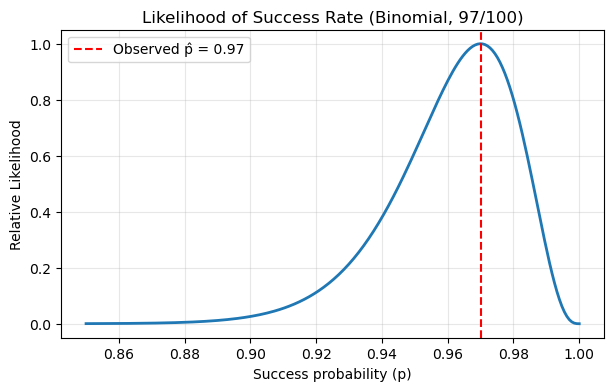

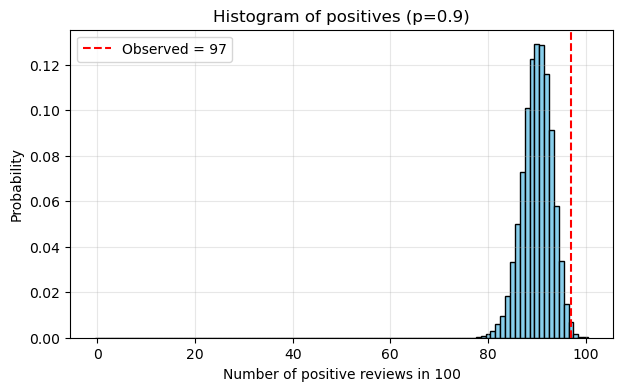

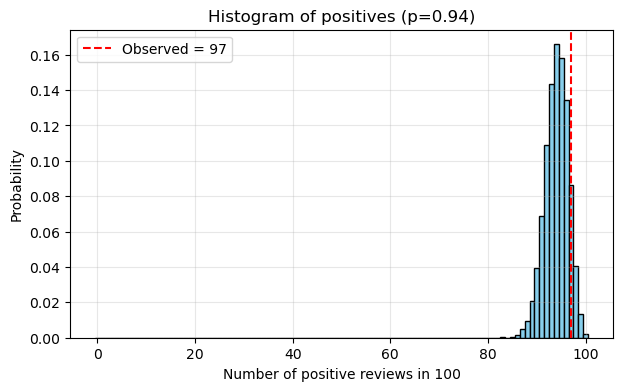

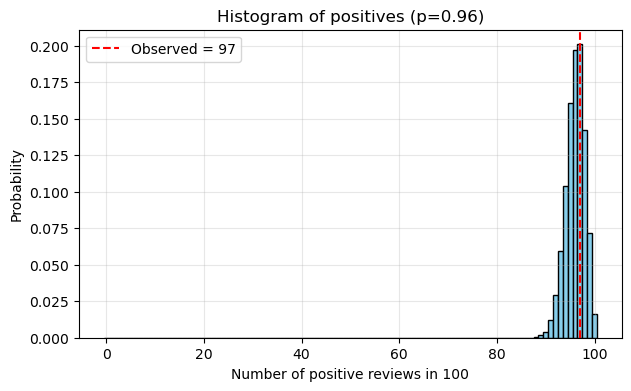

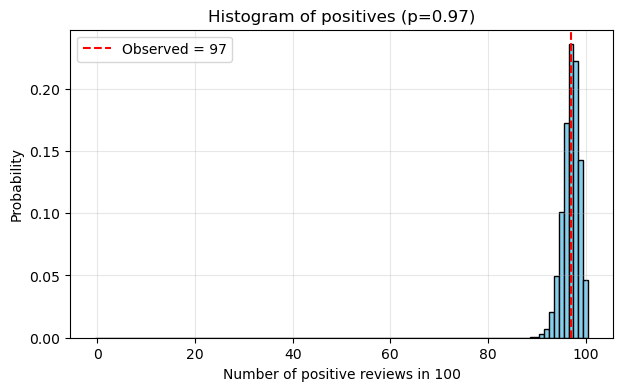

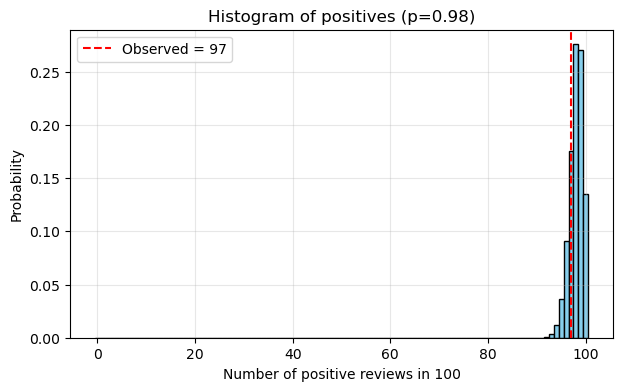

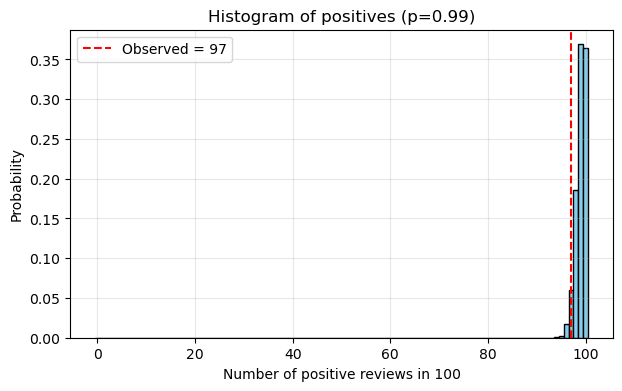

In [15]:
n = 100
k = 97
p_hat = k / n

p_grid = np.linspace(0.85, 1.0, 200)

def log_binom_pmf(k, n, p):
    """Log of Binomial PMF for stability"""
    if p <= 0 or p >= 1:
        return -np.inf
    return (math.lgamma(n+1) - math.lgamma(k+1) - math.lgamma(n-k+1)
            + k*math.log(p) + (n-k)*math.log(1-p))

loglik = np.array([log_binom_pmf(k, n, p) for p in p_grid])
loglik -= np.max(loglik) 
likelihood = np.exp(loglik)

plt.figure(figsize=(7,4))
plt.plot(p_grid, likelihood, lw=2)
plt.axvline(p_hat, color="red", linestyle="--", label=f"Observed p̂ = {p_hat:.2f}")
plt.title("Likelihood of Success Rate (Binomial, 97/100)")
plt.xlabel("Success probability (p)")
plt.ylabel("Relative Likelihood")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()  

p_list = [0.90, 0.94, 0.96, 0.97, 0.98, 0.99]
rng = np.random.default_rng(42)

for p in p_list:
    sims = rng.binomial(n=n, p=p, size=20000)  # simulate 20k experiments
    plt.figure(figsize=(7,4))
    plt.hist(sims, bins=np.arange(n+2)-0.5, color="skyblue", edgecolor="black", density=True)
    plt.axvline(k, color="red", linestyle="--", label=f"Observed = {k}")
    plt.title(f"Histogram of positives (p={p})")
    plt.xlabel("Number of positive reviews in 100")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()  

In [16]:
def column_entropy(series, bins=10):
    data = series.dropna()

    if data.empty:
        return np.nan
        
    if data.dtype == "object" or str(data.dtype) == "category":
        counts = data.value_counts(normalize=True)
        return entropy(counts, base=2)

    else:
        counts, _ = np.histogram(data, bins=bins)
        probs = counts / counts.sum()
        probs = probs[probs > 0] 
        return entropy(probs, base=2)


def dataset_entropy(df, bins=10):
    """
    Compute entropy for each column in a dataframe.
    """
    entropies = {}
    for col in df.columns:
        entropies[col] = column_entropy(df[col], bins=bins)
    return pd.Series(entropies)

df1 = pd.read_csv("Housing.csv")
df2 = pd.read_csv("advertising.csv")     
df3 = pd.read_csv("aircraft.csv")    

print("Housing Entropies:")
print(dataset_entropy(df1))

print("Advertising Entropies:")
print(dataset_entropy(df2))

print("aircraft Entropies:")
print(dataset_entropy(df3))

Housing Entropies:
price               2.558412
area                2.416578
bedrooms            1.578376
bathrooms           0.944786
stories             1.601335
mainroad            0.587593
guestroom           0.675642
basement            0.934477
hotwaterheating     0.268594
airconditioning     0.899528
parking             1.547615
prefarea            0.786392
furnishingstatus    1.557256
dtype: float64
Advertising Entropies:
TV           3.298521
Radio        3.289581
Newspaper    2.752203
Sales        3.053043
dtype: float64
aircraft Entropies:
UPDATED                0.224327
ENTRY_DATE             2.789723
EVENT_LCL_DATE         3.850247
EVENT_LCL_TIME         6.197270
LOC_CITY_NAME          6.278654
LOC_STATE_NAME         4.332994
LOC_CNTRY_NAME         0.000000
RMK_TEXT               6.326847
EVENT_TYPE_DESC        0.910053
FSDO_DESC              5.205402
REGIST_NBR             6.375039
FLT_NBR                2.584963
ACFT_OPRTR             2.521641
ACFT_MAKE_NAME         3.89